In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import sys
import json
import os
import numpy as np

In [2]:
import scanpy
from functools import partial

import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import pickle
import numpy as np

In [3]:
X = scanpy.read_h5ad('data/cytof.h5ad')._X
Y = scanpy.read_h5ad('data/scrna.h5ad')._X
n = len(Y)
print(X.shape, Y.shape)

(135334, 41) (4683, 256)


In [4]:
checkpoint_number = 1
filename = 'embeddings/embeddings_all' + str(checkpoint_number)
with open(filename, 'rb') as handle:
    embeddings_all = pickle.load(handle)

vis_x_cytof, vis_y_cytof = embeddings_all[:, 0][3*n:], embeddings_all[:, 1][3*n:]
vis_x_scrna_init, vis_y_scrna_init = embeddings_all[:, 0][:n], embeddings_all[:, 1][:n]
vis_x_scrna_check, vis_y_scrna_check = embeddings_all[:, 0][n:2*n], embeddings_all[:, 1][n:2*n]
vis_x_scrna_pred, vis_y_scrna_pred = embeddings_all[:, 0][2*n:3*n], embeddings_all[:, 1][2*n:3*n]


In [5]:
checkpoint_number = 2
filename = 'embeddings/embeddings_all' + str(checkpoint_number)
with open(filename, 'rb') as handle:
    embeddings_all = pickle.load(handle)
vis_x_scrna_check2, vis_y_scrna_check2 = embeddings_all[:, 0][2*n:3*n], embeddings_all[:, 1][2*n:3*n]

In [6]:
filename = "embeddings/embeddings_half_epoch" #'../paper/embeddings_half_epoch
with open(filename, 'rb') as handle:
    embeddings_all = pickle.load(handle)
vis_x_scrna_check2, vis_y_scrna_check2 = embeddings_all[:, 0][2*n:3*n], embeddings_all[:, 1][2*n:3*n]

In [7]:
subsample = False
if subsample:
    np.random.seed(1)
    subsample_size_x = 5000
    subsample_size_y = 2000
    n, m = len(Y), len(X)
    indices_x = np.random.choice(m, subsample_size_x)
    indices_y = np.random.choice(n, subsample_size_y)
    vis_x_cytof, vis_y_cytof = vis_x_cytof[indices_x], vis_y_cytof[indices_x]
    vis_x_scrna_check, vis_y_scrna_check = vis_x_scrna_check[indices_y], vis_y_scrna_check[indices_y]
    vis_x_scrna_init, vis_y_scrna_init = vis_x_scrna_init[indices_y], vis_y_scrna_init[indices_y]
    vis_x_scrna_pred, vis_y_scrna_pred = vis_x_scrna_pred[indices_y], vis_y_scrna_pred[indices_y]

In [8]:
to_plot = [[(vis_x_cytof, vis_y_cytof), (vis_x_scrna_init, vis_y_scrna_init)],
           [(vis_x_cytof, vis_y_cytof), (vis_x_scrna_check2, vis_y_scrna_check2)],
           [(vis_x_cytof, vis_y_cytof), (vis_x_scrna_check, vis_y_scrna_check)],
           [(vis_x_cytof, vis_y_cytof), (vis_x_scrna_pred, vis_y_scrna_pred)]
          ]

legends = [[r"$\mu$", r"$\nu_{\theta_0}$"],
           [r"$\mu$", r"$\nu_{\theta_{529}}$"],           
           [r"$\mu$", r"$\nu_{\theta_{1058}}$"],
           [r"$\mu$", r"$\nu_{\theta_{\infty}}$"]
          ]

/Users/othmanesebbouh/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


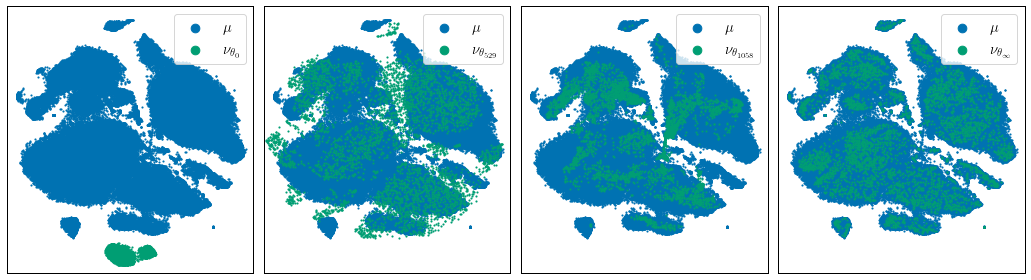

In [9]:
rc = {"pdf.fonttype": 42, 'text.usetex': True, 'text.latex.preview': True}
plt.rcParams.update(rc)

plt.style.use('seaborn-colorblind')

thickness = 5

plt.figure(figsize=(18, 4))

k = 1
for i, clouds in enumerate(to_plot):
    ax = plt.subplot(1, len(to_plot) + 1, k)
    k += 1
    cloud1, cloud2 = clouds
    ax.scatter(cloud1[0], cloud1[1],  marker='.', s=thickness)
    ax.scatter(cloud2[0], cloud2[1],  marker='.', s=thickness)
    ax.set_xlim(-20.5, 20.5)
    ax.set_ylim(-25, 25)
    lgnd = plt.legend(legends[i], fontsize=15)
    lgnd.legendHandles[0]._sizes = [300]
    lgnd.legendHandles[1]._sizes = [300]
    plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False,
    left=False,
    labelleft=False)
    plt.setp(ax.spines.values(), linewidth=1, color='black')

plt.tight_layout()
plt.savefig("../figures/fig3.png", 
            bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')